In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv('/content/CUSTOMER_REVIEWS.csv')
df

,Review ID,Customer Name,Purchased Item,Review,Rating
0,1,SHRIBAS KUNDU,Smart Bulb,Excellent quality,5
1,2,SHUBHAM KUMAR,Electric Toothbrush,Would not buy again,0
2,3,SABYASACHI BOSE,Electric Shaver,Defective item,4
3,4,DEBANJAN DE,Headphones,Excellent,5
4,5,AKASH KUMAR YADAV,Vacuum Cleaner,As described,5
...,...,...,...,...,...
95,96,ABHAY SUTRADHAR,Electric Fan,Not up to the mark,1
96,97,KRISHNA KANT CHOUHAN,Headphones,Late delivery,2
97,98,SALONI KUMARI SINGH,Camera,Superb support,3
98,99,KISHANU SARKAR,Fitness Tracker,Not happy,0


In [ ]:
df.head()

,Review ID,Customer Name,Purchased Item,Review,Rating
0,1,SHRIBAS KUNDU,Smart Bulb,Excellent quality,5
1,2,SHUBHAM KUMAR,Electric Toothbrush,Would not buy again,0
2,3,SABYASACHI BOSE,Electric Shaver,Defective item,4
3,4,DEBANJAN DE,Headphones,Excellent,5
4,5,AKASH KUMAR YADAV,Vacuum Cleaner,As described,5


In [ ]:
df.shape

(100, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Review ID       100 non-null    int64 
 1   Customer Name   100 non-null    object
 2   Purchased Item  100 non-null    object
 3   Review          100 non-null    object
 4   Rating          100 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


In [ ]:
df[["Review"]]

,Review
0,Excellent quality
1,Would not buy again
2,Defective item
3,Excellent
4,As described
...,...
95,Not up to the mark
96,Late delivery
97,Superb support
98,Not happy


In [ ]:
unique_values = df['Review'].unique()
print(unique_values)

['Excellent quality' 'Would not buy again' 'Defective item' 'Excellent'
 'As described' 'Overall good' 'Very disappointed' 'As expected'
 'Great service' 'Recommend' 'Good value' 'Late delivery'
 'Faster shipping' 'Service okay' 'Damaged' 'Excellent delivery'
 'Met expectations' 'Could be better' 'Arrived late'
 'Quality below expectations' 'Highly satisfied' 'Below average service'
 'Delayed shipping' 'Very good' 'Great value' 'Not worth the hype'
 'Good product' 'Great quality' 'Below average' 'Smooth shipping'
 'Satisfied with delivery' 'Would buy again' 'Superb quality'
 'Prompt support' 'Exceptional quality' 'As promised' 'Happy purchase'
 'Not what I wanted' 'Okay product' 'Not satisfied' 'Satisfactory'
 'Very impressed' 'Fast shipping' 'On time delivery' 'Not happy'
 'Nice product' 'Quick delivery' 'Just okay' 'Helpful service'
 'Good experience' 'Not up to the mark' 'Superb support']


In [ ]:
value_counts = df['Review'].value_counts()
print(value_counts)


Review
Very disappointed             5
Excellent                     4
Damaged                       4
Smooth shipping               4
Arrived late                  3
Satisfied with delivery       3
Not worth the hype            3
Nice product                  3
Would not buy again           3
Met expectations              3
Late delivery                 3
Prompt support                3
Great service                 3
Overall good                  3
Defective item                3
Very good                     2
Superb quality                2
Below average                 2
Exceptional quality           2
Very impressed                2
Not satisfied                 2
Great value                   2
Okay product                  2
On time delivery              2
Not happy                     2
Faster shipping               2
As expected                   2
As described                  2
Fast shipping                 1
Not what I wanted             1
Quick delivery                1
J

In [ ]:
df['Review_encoded'] = pd.Categorical(df['Review']).codes

In [ ]:
print(df)

    Review ID         Customer Name       Purchased Item               Review  \
0           1         SHRIBAS KUNDU           Smart Bulb    Excellent quality   
1           2         SHUBHAM KUMAR  Electric Toothbrush  Would not buy again   
2           3       SABYASACHI BOSE      Electric Shaver       Defective item   
3           4           DEBANJAN DE           Headphones            Excellent   
4           5     AKASH KUMAR YADAV       Vacuum Cleaner         As described   
..        ...                   ...                  ...                  ...   
95         96       ABHAY SUTRADHAR         Electric Fan   Not up to the mark   
96         97  KRISHNA KANT CHOUHAN           Headphones        Late delivery   
97         98   SALONI KUMARI SINGH               Camera       Superb support   
98         99        KISHANU SARKAR      Fitness Tracker            Not happy   
99        100       RAJNI KUMBHAKAR      Air Conditioner         Arrived late   

    Rating  Review_encoded 

In [ ]:
df.drop('Review', axis=1, inplace=True)

In [ ]:
df

,Review ID,Customer Name,Purchased Item,Rating,Review_encoded
0,1,SHRIBAS KUNDU,Smart Bulb,5,12
1,2,SHUBHAM KUMAR,Electric Toothbrush,0,51
2,3,SABYASACHI BOSE,Electric Shaver,4,8
3,4,DEBANJAN DE,Headphones,5,10
4,5,AKASH KUMAR YADAV,Vacuum Cleaner,5,1
...,...,...,...,...,...
95,96,ABHAY SUTRADHAR,Electric Fan,1,31
96,97,KRISHNA KANT CHOUHAN,Headphones,2,26
97,98,SALONI KUMARI SINGH,Camera,3,46
98,99,KISHANU SARKAR,Fitness Tracker,0,29


In [ ]:
df['Product_Item_encoded'] = pd.Categorical(df['Purchased Item']).codes

In [ ]:
df

,Review ID,Customer Name,Purchased Item,Rating,Review_encoded,Product_Item_encoded
0,1,SHRIBAS KUNDU,Smart Bulb,5,12,34
1,2,SHUBHAM KUMAR,Electric Toothbrush,0,51,17
2,3,SABYASACHI BOSE,Electric Shaver,4,8,16
3,4,DEBANJAN DE,Headphones,5,10,22
4,5,AKASH KUMAR YADAV,Vacuum Cleaner,5,1,41
...,...,...,...,...,...,...
95,96,ABHAY SUTRADHAR,Electric Fan,1,31,13
96,97,KRISHNA KANT CHOUHAN,Headphones,2,26,22
97,98,SALONI KUMARI SINGH,Camera,3,46,4
98,99,KISHANU SARKAR,Fitness Tracker,0,29,19


In [ ]:
df.drop('Purchased Item', axis=1, inplace=True)
df

,Review ID,Customer Name,Rating,Review_encoded,Product_Item_encoded
0,1,SHRIBAS KUNDU,5,12,34
1,2,SHUBHAM KUMAR,0,51,17
2,3,SABYASACHI BOSE,4,8,16
3,4,DEBANJAN DE,5,10,22
4,5,AKASH KUMAR YADAV,5,1,41
...,...,...,...,...,...
95,96,ABHAY SUTRADHAR,1,31,13
96,97,KRISHNA KANT CHOUHAN,2,26,22
97,98,SALONI KUMARI SINGH,3,46,4
98,99,KISHANU SARKAR,0,29,19


In [ ]:
x=df.iloc[:,[3,4]].values
print(x)

[[12 34]
 [51 17]
 [ 8 16]
 [10 22]
 [ 1 41]
 [36 42]
 [47 37]
 [ 2 13]
 [20  6]
 [40 19]
 [36  8]
 [10  0]
 [18 33]
 [26 39]
 [15 29]
 [43 37]
 [ 7  6]
 [11 12]
 [47 19]
 [27 33]
 [ 6  1]
 [ 0  5]
 [ 8 31]
 [20 35]
 [38 39]
 [ 8 12]
 [24 32]
 [ 5 32]
 [ 9  2]
 [48 30]
 [47 11]
 [10 29]
 [21  6]
 [33 15]
 [17 25]
 [33 16]
 [19 24]
 [ 4 41]
 [44 31]
 [51 33]
 [42  9]
 [ 7 41]
 [50 36]
 [45 34]
 [ 4 40]
 [36  9]
 [10 19]
 [42  4]
 [21 44]
 [ 2 33]
 [ 7  5]
 [37 16]
 [51 21]
 [48 25]
 [45 16]
 [13 33]
 [ 3 42]
 [44 25]
 [47 42]
 [22  7]
 [42 39]
 [32 43]
 [20 35]
 [37 38]
 [34  7]
 [30  3]
 [41 15]
 [15 27]
 [49 12]
 [14 14]
 [35 28]
 [27 22]
 [49 11]
 [35 10]
 [30 29]
 [29 15]
 [13 26]
 [34 24]
 [37  9]
 [28 20]
 [28  8]
 [27  8]
 [26  8]
 [33  4]
 [28 41]
 [ 0 17]
 [39 32]
 [25 27]
 [47 15]
 [44 17]
 [ 7 39]
 [ 1 18]
 [23 28]
 [44 23]
 [16 13]
 [31 13]
 [26 22]
 [46  4]
 [29 19]
 [ 0  1]]


In [ ]:
wcss = []

for i in range(1,50):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

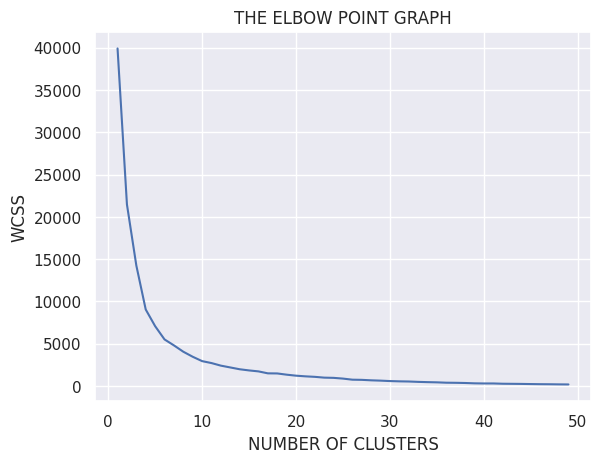

In [ ]:
import seaborn as sns
sns.set()
plt.plot(range(1,50),wcss)
plt.title('THE ELBOW POINT GRAPH')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(x)

print(Y)

[0 1 3 0 0 4 4 3 2 1 2 3 0 4 0 4 3 3 1 4 3 3 0 0 4 3 0 0 3 4 1 0 2 2 0 2 0
 0 4 4 1 0 4 4 0 2 3 1 0 0 3 2 1 1 1 0 0 1 4 2 4 4 0 4 2 2 1 0 1 3 4 2 1 2
 4 2 0 4 2 2 2 2 2 2 4 3 4 0 1 1 0 3 0 1 3 2 2 1 2 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K_MEAN CLUSTER=5

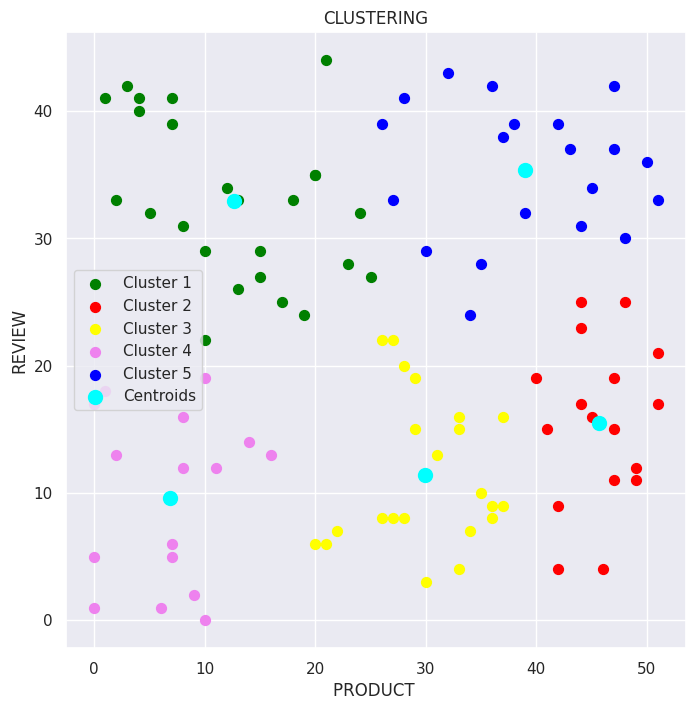

In [ ]:
#VISUALIZING ALL THE CLUSTERS
#plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(x[Y==0,0], x[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x[Y==1,0], x[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x[Y==2,0], x[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x[Y==3,0], x[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(x[Y==4,0], x[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('CLUSTERING')
plt.xlabel('PRODUCT ')
plt.ylabel('REVIEW')
plt.legend()
plt.show()